Исходные функции

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp, pi

from scipy.fftpack import fft, ifft

%matplotlib inline

def DIT_FFT(f):
    N = len(f)
    if N <= 1:
        return f

    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    
    # division
    even= DIT_FFT(f[0::2])
    odd = DIT_FFT(f[1::2])

    # store combination of results
    temp = np.zeros(N).astype(np.complex64)
    
    # only required to compute for half the frequencies 
    # since u+N/2 can be obtained from the symmetry property
    for u in range(N//2):
        temp[u] = even[u] + exp(-2j*pi*u/N) * odd[u] 
        temp[u+N//2] = even[u] - exp(-2j*pi*u/N)*odd[u] 
                
    return temp

In [2]:
observations_num = 64
t = np.arange(0, 1, 1/observations_num)
# Signals
yn = 1*np.sin(t*(2*pi) * 5)
zn = 1*np.cos(t*(2*pi)) 

In [ ]:
# list of frequencies
f_list = [yn, zn]
t_list = ['y=sin(5x)', 'z=cos(x)']
# Plot
plt.figure(figsize=(14, 6), dpi=80)
for i in range(2):
    plt.subplot(3, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=2.0)
    plt.title(t_list[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, f_list[i].size-1])
    plt.grid()
plt.tight_layout()

Циклическая свертка
1. Инвертируем второй сигнал,
2. В цикле от 0 до N-1 сдвигаем второй сигнал вправо (или первый сигнал влево),
3. Вычисляем на каждом шаге цикла произведения элементов и подсчитываем сумму произведений.

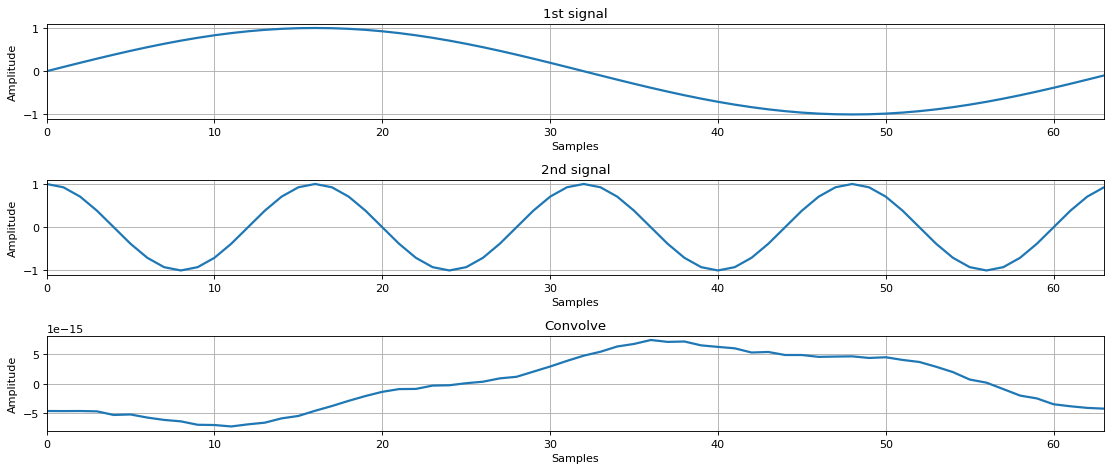

In [9]:
def circle_conv(an, bn):
  N = len(an)
  if N != len(bn):
    raise ValueError("len(an) != len(bn)")

  # Convolution with list comprehension:
  ab = np.array([np.sum(an * np.roll(bn[::-1], i+1)) for i in range(N)])
  return ab

# Calculate circular convolution
cv = circle_conv(yn, zn)

# list of frequencies
f_list = [yn, zn, cv]
t_list = ['1st signal', '2nd signal', 'Convolve']
# Plot
plt.figure(figsize=(14, 6), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=2.0)
    plt.title(t_list[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, f_list[i].size-1])
    plt.grid()
plt.tight_layout()

Корреляция 

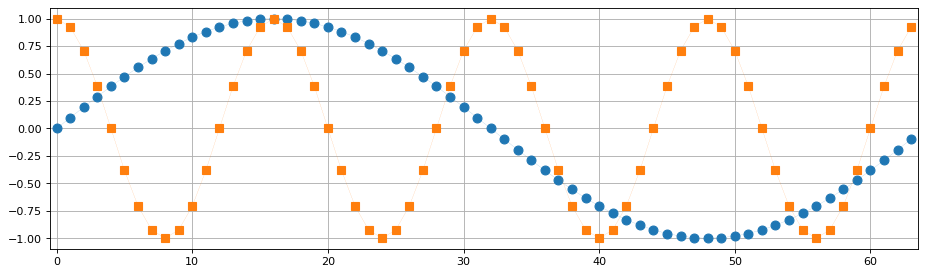

In [8]:
# correlation
ryz = np.sum(yn*zn)

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(yn, '-o', linewidth=0.1, markersize=8)
plt.plot(zn, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, observations_num-0.5])
plt.grid(True)

Свертка через БПФ

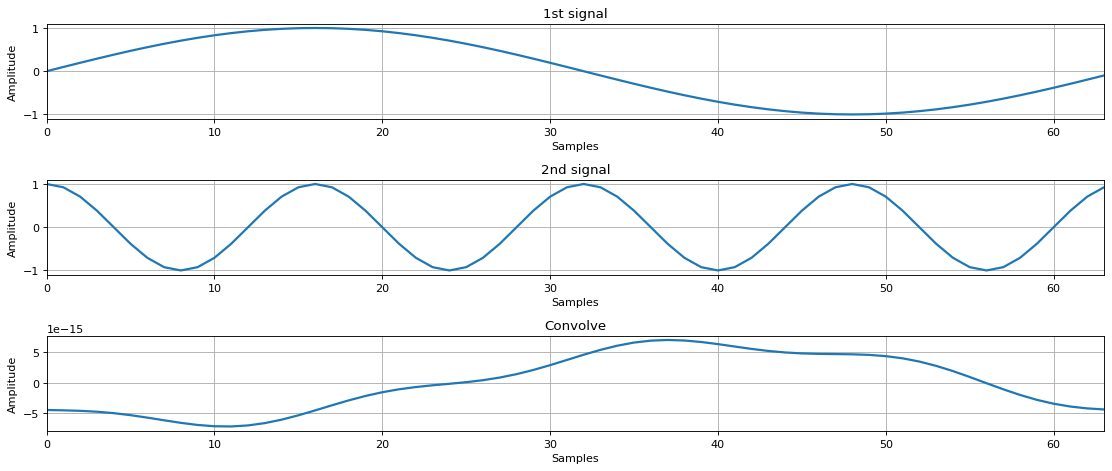

In [6]:
def circle_conv_via_dit_fft(an, bn):
  interim_result = DIT_FFT(an) * DIT_FFT(bn)
  return np.real(DIT_FFT(np.divide(interim_result[-np.arange(interim_result.shape[0])],interim_result.shape[-1])))

# Calculate circular convolution
cv = circle_conv_via_dit_fft(yn, zn)

# list of frequencies
f_list = [yn, zn, cv]
t_list = ['1st signal', '2nd signal', 'Convolve']
# Plot
plt.figure(figsize=(14, 6), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=2.0)
    plt.title(t_list[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, f_list[i].size-1])
    plt.grid()
plt.tight_layout()

Кореляция через БПФ 

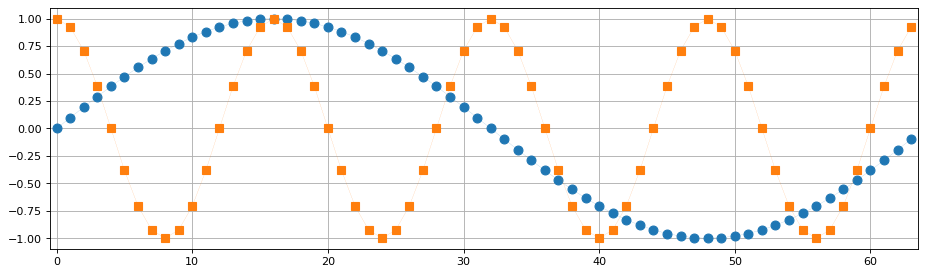

In [5]:
def corr_via_dit_fft(an, bn):
  interim_result = DIT_FFT(an) * DIT_FFT(bn)
  return np.max(np.real(DIT_FFT(np.divide(interim_result[-np.arange(interim_result.shape[0])],interim_result.shape[-1]))))

ryz = corr_via_dit_fft(yn, zn)

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(yn, '-o', linewidth=0.1, markersize=8)
plt.plot(zn, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, observations_num-0.5])
plt.grid(True)